# STAT 301 Assignment 2
**Eric Liu** (November 2023)

# Data
- Taken from Assignment 1

**Data Science Job Salaries:** https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

## Observations & Variables
This dataset contains information corresponding to a variety of data science jobs, with each of the 607 observations corresponding to an individual data science job information. The data contains 11 data variables (`X` is number of rows/index):

1. **`work_year`** - The year the salary was paid [`int`]
2. **`experience_level`** -The experience level in the job during the year [`chr`]
    - EN (Entry-level/Junior)
    - MI (Mid-level/Intermediate)
    - SE (Senior-level/Expert)
    - EX (Executive-level/Director)
3. **`employment_type`** - The type of employement for the role [`chr`]
    - PT (Part-time)
    - FT (Full-time)
    - CT (Contract)
    - FL (Freelance)
4. **`job_title`** - The role worked in during the year [`chr`]
5. **`salary`** - The total gross salary amount paid [`int`]
6. **`salary_currency`** - The currency of the salary paid as an ISO 4217 currency code [`chr`]
7. **`salary_in_usd`** - The salary in USD [`int`]
8. **`employee_residence`** - Employee's primary country of residence in during the work year as an ISO 3166 country code [`chr`]
9. **`remote_ratio`** - The overall amount of work done remotely [`int`]
    - 0 (No remote to 20%)
    - 50 (Partially remote)
    - 100 (80% to fully remote)
10. **`company_location`** - The country of the employer's main office or contracting branch as an ISO 3166 country code [`chr`]
11. **`company_size`** - The average number of people that worked for the company during the year [`chr`]
    - S (less than 50 employees)
    - M (50 to 250 employees)
    - L (more than 250 employees)
    
The dataset contains:
- **3** continuous numerical columns: `work_year`, `salary`, `salary_in_usd`
- **4** categorical variables: `job_title`, `salary_currency`, `employee_residence`, `company_location`
- **4** ordinal variables: `experience_level`, `employment_type`,`remote_ratio`, `company_size`
- There are zero NA/empty values in the dataset

## Question
> What are the significant explanatory variables that contribute to `salary_in_usd`

This dataset provides a significant range of categorical and numerical variables to be used to predict the salary in the data science field. Notably, we tend to believe that greater `experience_level` and `employment_type` would be significant contributers, but it would be interesting to analyze if `remote_ratio` or `job_title` have an effect as well. Using the data we could find correlations between the features and produce linear models to infer scores. This question would be primarily inference of past salaries, but could also be used to predict future salaries based on the explanatory variables.

# Exploratory Data Analysis

In [1]:
# Load required libraries
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load dataset from online
data <- read.csv("https://raw.githubusercontent.com/celike1/STAT301_Project/main/ds_salaries.csv", row.names = 1)
head(data)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [3]:
# Check for Missing values
apply(data, 2, function(x) any(is.na(x)))

work_year   experience_level    employment_type          job_title 
             FALSE              FALSE              FALSE              FALSE 
            salary    salary_currency      salary_in_usd employee_residence 
             FALSE              FALSE              FALSE              FALSE 
      remote_ratio   company_location       company_size 
             FALSE              FALSE              FALSE

In [4]:
# Column Names
colnames(data)

[1] "work_year"          "experience_level"   "employment_type"   
 [4] "job_title"          "salary"             "salary_currency"   
 [7] "salary_in_usd"      "employee_residence" "remote_ratio"      
[10] "company_location"   "company_size"

In [5]:
glimpse(data)

Rows: 607
Columns: 11
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <chr> "MI", "SE", "SE", "MI", "SE", "EN", "SE", "MI", "MI…
$ employment_type    <chr> "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT…
$ job_title          <chr> "Data Scientist", "Machine Learning Scientist", "Bi…
$ salary             <int> 70000, 260000, 85000, 20000, 150000, 72000, 190000,…
$ salary_currency    <chr> "EUR", "USD", "GBP", "USD", "USD", "USD", "USD", "H…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ company_size       <chr> "L", "S", "M", "S", "L", "L", "S", "L", "L", "S", "…


**Dropping un-used columns, changing characters to factors**

In [6]:
data <- data %>% 
    mutate_if(sapply(data, is.character), as.factor) %>% 
    select(-c(salary,salary_currency))
glimpse(data)

Rows: 607
Columns: 9
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <fct> MI, SE, SE, MI, SE, EN, SE, MI, MI, SE, EN, MI, EN,…
$ employment_type    <fct> FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT,…
$ job_title          <fct> Data Scientist, Machine Learning Scientist, Big Dat…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ company_size       <fct> L, S, M, S, L, L, S, L, L, S, S, L, M, L, L, L, S, …


**Renaming values to understandable strings**

In [7]:
data <- data %>% 
    mutate(experience_level = recode(experience_level, EN = "Entry/Junior", 
                                                       MI = "Mid-level", 
                                                       SE = "Senior/Expert", 
                                                       EX = "Executive")) %>% 
    mutate(employment_type = recode(employment_type, PT = "Part-Time", 
                                                     FT = "Full-Time", 
                                                     CT = "Contract", 
                                                     FL = "Freelance")) %>%  
    mutate(remote_ratio = recode_factor(remote_ratio, '0'= "Stationary", 
                                                      '50' = "Partially remote", 
                                                      '100' = "Remote")) 

glimpse(data)

Rows: 607
Columns: 9
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <fct> Mid-level, Senior/Expert, Senior/Expert, Mid-level,…
$ employment_type    <fct> Full-Time, Full-Time, Full-Time, Full-Time, Full-Ti…
$ job_title          <fct> Data Scientist, Machine Learning Scientist, Big Dat…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ remote_ratio       <fct> Stationary, Stationary, Partially remote, Stationar…
$ company_location   <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ company_size       <fct> L, S, M, S, L, L, S, L, L, S, S, L, M, L, L, L, S, …


**Summary Statistics**

### Data Source
Data was indicated to be sourced from https://salaries.ai-jobs.net/. However, site cannot be reached.

In [8]:
# Summary statistics
summary(data)

   work_year         experience_level  employment_type
 Min.   :2020   Entry/Junior : 88     Contract :  5   
 1st Qu.:2021   Executive    : 26     Freelance:  4   
 Median :2022   Mid-level    :213     Full-Time:588   
 Mean   :2021   Senior/Expert:280     Part-Time: 10   
 3rd Qu.:2022                                         
 Max.   :2022                                         
                                                      
                     job_title   salary_in_usd    employee_residence
 Data Scientist           :143   Min.   :  2859   US     :332       
 Data Engineer            :132   1st Qu.: 62726   GB     : 44       
 Data Analyst             : 97   Median :101570   IN     : 30       
 Machine Learning Engineer: 41   Mean   :112298   CA     : 29       
 Research Scientist       : 16   3rd Qu.:150000   DE     : 25       
 Data Science Manager     : 12   Max.   :600000   FR     : 18       
 (Other)                  :166                    (Other):129       
        

Subsetting the columns into 3 groups: **Categorical, Numeric, Ordinal**. For future use

In [9]:
# Group Columns
cat_colnames <- c('employment_type', 'job_title', 'employee_residence', 'company_location')
num_colnames <- c('work_year', 'salary_in_usd', 'remote_ratio')
ord_colnames <- c('experience_level', 'company_size')

## Visualizations

The question I posed in Assignment one was:
> What are the significant explanatory variables that contribute to `salary_in_usd`

Socially we know that usually a higher salary correlates to variables such as `experience_level`. By creating preliminary histograms, one for each unique value of the variable, we can get a informative view of the distribution of salaries. This helps us formulate hypotheses to whether or not they will have a positive or negative effect in our models

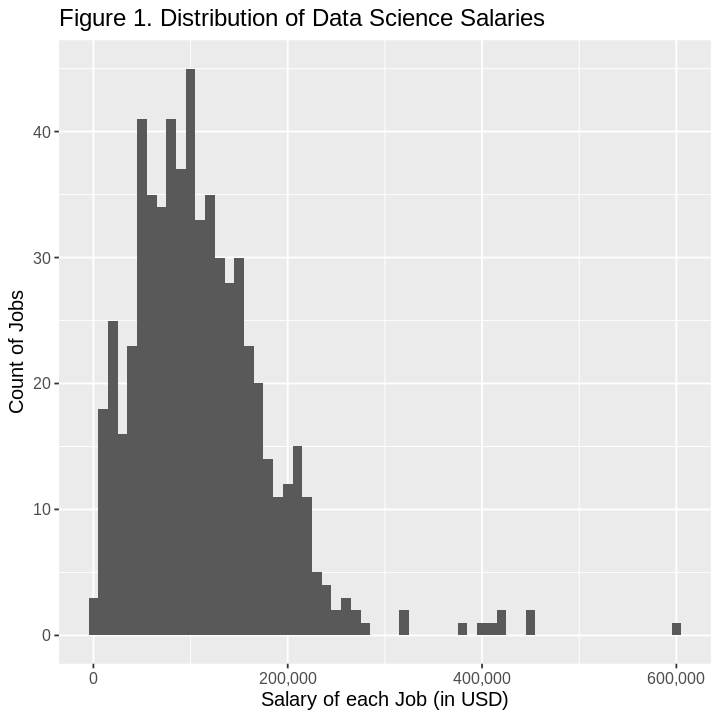

In [10]:
options(repr.plot.width=6, repr.plot.height=6)

p1 <- ggplot(data) +
    geom_histogram(aes(x = salary_in_usd), binwidth = 10000) +
    xlab("Salary of each Job (in USD)") +
    ylab("Count of Jobs") +
    ggtitle("Figure 1. Distribution of Data Science Salaries") + 
    scale_x_continuous(labels = scales::comma) +
    theme(text = element_text(size=12))
plot(p1)

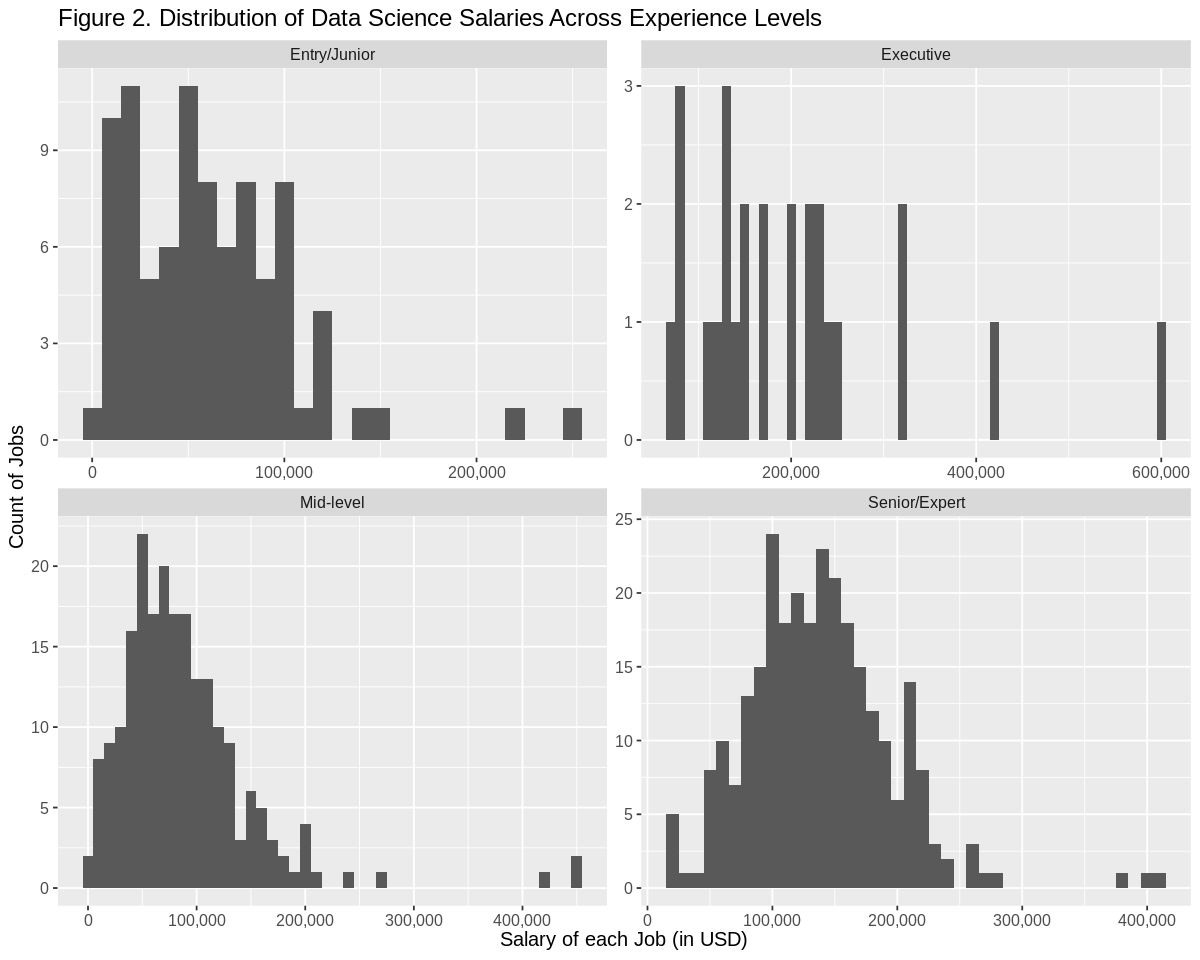

In [11]:
options(repr.plot.width=10, repr.plot.height=8)

# Plotting each Distribution
p2 <- ggplot(data) +
    geom_histogram(aes(x = salary_in_usd), binwidth = 10000) +
    xlab("Salary of each Job (in USD)") +
    ylab("Count of Jobs") +
    ggtitle("Figure 2. Distribution of Data Science Salaries Across Experience Levels") + 
    facet_wrap(~experience_level, scale="free") +
    scale_x_continuous(labels = scales::comma) +
    theme(text = element_text(size=12))
plot(p2)

Although this is very preliminary plotting, it gives us some insights about the trends and values in the `experience_level` explanatory variable such as:
- We see that general range of salaries for each of the 4 experience level groups
- We see that the median/mean salaries seem to increases positively with experience level
- We see the distribution values in the dataset to each experience levels (Which group is represented more/less)
- We can see that the *Executive* group contains fewer values than the rest, this asymmetry should considered during model creation.

This information allows us to create hypotheses so that we can verify and test if our model makes sense, and catch issues early such as the uneven counts in each group.